# WORLD HAPPINESS ANALYSIS

### SOURCE: https://worldhappiness.report/ed/2019/

### James Dietz, Chris Howard, Rafael Santos

## SUMMARY:

### We conducted an analysis of the data from the most recent World Happiness Report, 2019, using machine language algorithms to predict country happiness and regression modeling to examine the factors that affect happiness.  In sum:
   #### - All models performed relatively well.  After fitting the model, the model was used to predict data reserved for testing and models often did so with accuracy in the low .80-.85 range.
   #### - Cluster analysis was used to create to groups of countries--one of relatively high happiness and one with lower relative happiness.
   #### - Logistic, Neural Network Deep Learning, Support Vector Classification, K Nearest Neighbors, and Random Forests were used to predict target category.    
   #### - Linear Regression Machine Learning was used to predict where countries fell on the ordinal happiness scale called "Life Ladder". This model performed less well, predicting the level of country accuracy with only .60.
   #### - Finally, a traditional OLS regression model was fit to examine the factors that affect happiness.  It appears that GDP per capita, social support, and freedom to make ones own life choices all made statistically significant and substantively large roles in individual happiness. Perceptions of corruption in government and business had a large negative, statistically significant impact on happiness.  Generosity levels, life expectancy, country inequality (as measured by GINI coefficient), and negative attitudes were not found to be statistically signficant.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Read dataset from CSV file
happiness = pd.read_csv("happiness2018.csv")
happiness.head()

,Country,Year,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,Democratic_Quality,Delivery_Quality,Std_dev_ladder,Std_dev/mean,GINI_avg_2000-2016
0,Afghanistan,2018,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666,NaN,NaN,1.408344,0.522712,NaN
1,Albania,2018,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,NaN,NaN,2.640531,0.527642,0.303250
2,Algeria,2018,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN,NaN,NaN,1.973943,0.391416,0.276000
3,Angola,2014,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,-0.739363,-1.168539,2.196711,0.578868,0.473500
4,Argentina,2018,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,NaN,NaN,2.472559,0.426833,0.460938


In [4]:
# Drop some columns that are not needed for our analyses in this notebook.  Two quality measures have low N.
happiness.drop(['Year', 'Std_dev_ladder', 'Std_dev/mean', 'Democratic_Quality', 'Delivery_Quality'], axis=1, inplace=True)

In [5]:
# Basic descriptive statistics
happiness.describe()

,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg_2000-2016
count,166.000000,153.000000,164.000000,161.000000,165.000000,150.000000,153.000000,163.000000,164.000000,147.000000,140.000000
mean,5.461972,9.255889,0.802892,63.991535,0.776303,-0.020070,0.732098,0.707329,0.294875,0.507585,0.388681
std,1.106842,1.206215,0.123927,7.041922,0.132310,0.154997,0.181765,0.114656,0.097295,0.201886,0.082932
min,2.694303,6.494117,0.319589,45.200001,0.281458,-0.336385,0.096563,0.369440,0.092696,0.079710,0.211000
25%,4.659800,8.349397,0.737099,58.500000,0.712590,-0.139109,0.691070,0.625957,0.217299,0.350965,0.326130
50%,5.476432,9.412399,0.830223,65.900002,0.797057,-0.035319,0.793091,0.735184,0.282580,0.478412,0.380559
75%,6.233163,10.211576,0.903095,68.599998,0.876888,0.081078,0.848337,0.793008,0.357774,0.646812,0.433625
max,7.858107,11.693157,0.984489,76.800003,0.969898,0.499378,0.952014,0.902772,0.642589,0.988120,0.626000


In [6]:
# Sort by "Life_Ladder" which is measure of happiness and outcome variable.
happysort = happiness.sort_values(by='Life_Ladder', ascending=False)
happysort


,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg_2000-2016
48,Finland,7.858107,10.636060,0.962155,71.900002,0.937807,-0.131735,0.198605,0.781546,0.181781,0.555102,0.275615
40,Denmark,7.648786,10.755594,0.958219,72.400002,0.935438,0.015593,0.150607,0.821423,0.206053,0.632478,0.267000
143,Switzerland,7.508587,10.975945,0.930291,74.099998,0.926415,0.096369,0.301260,0.792226,0.191520,0.849979,0.328100
63,Iceland,7.476214,10.746841,0.966753,73.000000,0.938783,0.243324,0.726845,0.895255,0.148160,0.365042,0.280833
105,Netherlands,7.463097,10.809204,0.939443,72.300003,0.919985,0.155536,0.370558,0.861977,0.204794,0.656541,0.286333
111,Norway,7.444262,11.085626,0.965962,73.199997,0.960429,0.075728,0.268201,0.827414,0.211862,0.679503,0.272231
7,Austria,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679,0.302692
142,Sweden,7.374792,10.766932,0.930680,72.599998,0.941725,0.069573,0.262797,0.822676,0.160755,0.494396,0.274154
106,New Zealand,7.370286,10.501477,0.953863,73.199997,0.949300,0.116750,0.206580,0.845363,0.167951,0.642461,NaN
87,Luxembourg,7.242631,11.453928,0.902192,72.599998,0.883930,-0.025496,0.385146,0.750309,0.201894,0.755201,0.316077


### ANALYSIS:
#### Shows countries in order of average happiness (Life_Ladder). Generally shows Scandanavian and Northern European countries toward the top, US in upper middle, Middle Eastern countries generally in lower middle, and African and some SE Asian countries toward bottom.

In [7]:
# Groupby means by country
happysort.groupby('Country').mean()

,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg_2000-2016
Country,,,,,,,,,,,
Afghanistan,2.694303,7.494588,0.507516,52.599998,0.373536,-0.084888,0.927606,0.424125,0.404904,0.364666,NaN
Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,0.303250
Algeria,5.043086,9.557952,0.798651,65.900002,0.583381,-0.172413,0.758704,0.591043,0.292946,NaN,0.276000
Angola,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,0.473500
Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,0.460938
Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,0.319250
Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,0.342750
Austria,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679,0.302692
Azerbaijan,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372,0.211000


## BASIC PLOTS

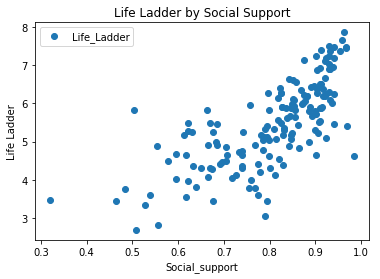

In [8]:
# Scatter Plot: Happiness x Social Support
happiness.plot(x='Social_support', y='Life_Ladder', style='o')
plt.title('Life Ladder by Social Support')
plt.ylabel('Life Ladder');


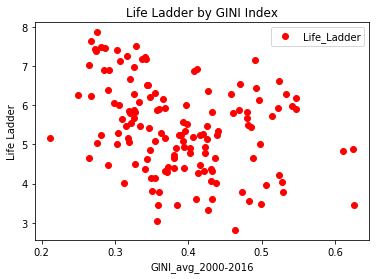

In [9]:
# Scatter Plot: Happiness x Economic Inequality Levels (GINI INDEX)
happiness.plot(x='GINI_avg_2000-2016', y='Life_Ladder', c='red', style='o')
plt.title('Life Ladder by GINI Index')
plt.ylabel('Life Ladder');


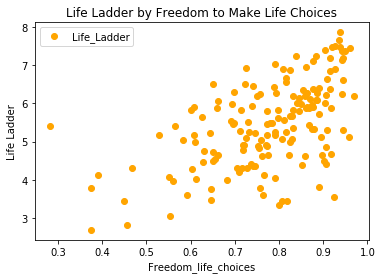

In [10]:
# Scatter Plot: Happiness x Freedom to Make Life Choices
happiness.plot(x='Freedom_life_choices', y='Life_Ladder', c='orange', style='o')
plt.title('Life Ladder by Freedom to Make Life Choices')
plt.ylabel('Life Ladder');


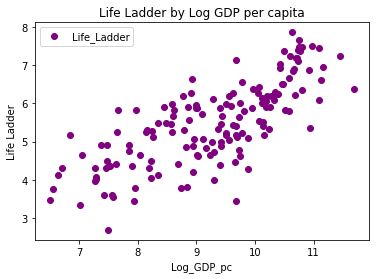

In [11]:
# Scatter Plot: Happiness x Log of GDP per Capita
happiness.plot(x='Log_GDP_pc', y='Life_Ladder', c='purple', style='o')
plt.title('Life Ladder by Log GDP per capita')
plt.ylabel('Life Ladder');


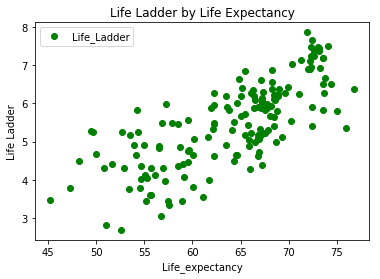

In [12]:
# Scatter Plot: Happiness x Life Expectancy
happiness.plot(x='Life_expectancy', y='Life_Ladder', c='green', style='o')
plt.title('Life Ladder by Life Expectancy')
plt.ylabel('Life Ladder');

## INVESTIGATING HOW THE DATA CLUSTER

In [13]:
# Dataframe of Life Ladder and Social Support
socialsupport = happiness[['Life_Ladder', 'Social_support']].copy()
socialsupport.head()

,Life_Ladder,Social_support
0,2.694303,0.507516
1,5.004403,0.683592
2,5.043086,0.798651
3,3.794838,0.754615
4,5.792797,0.899912


In [14]:
# Dataframe of Life Ladder and GINI
GINI = happiness[['Life_Ladder', 'GINI_avg_2000-2016']].copy()
GINI.head()

,Life_Ladder,GINI_avg_2000-2016
0,2.694303,NaN
1,5.004403,0.303250
2,5.043086,0.276000
3,3.794838,0.473500
4,5.792797,0.460938


In [15]:
# Dataframe of Life Ladder and Life Expectancy
lifeexpectancy = happiness[['Life_Ladder', 'Life_expectancy']].copy()
lifeexpectancy.head()

,Life_Ladder,Life_expectancy
0,2.694303,52.599998
1,5.004403,68.699997
2,5.043086,65.900002
3,3.794838,54.599998
4,5.792797,68.800003


In [16]:
# Dropping missing data
socialsupport.dropna(inplace=True)

In [17]:
GINI.dropna(inplace=True)

In [18]:
lifeexpectancy.dropna(inplace=True)

In [19]:
# Importing Sci-Kit Learn dependencies
# Pass KMeans to cluster data into 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [20]:
kmeans.fit(socialsupport)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
# Predict the clusters
predicted_clusters = kmeans.predict(socialsupport)
predicted_clusters

array([1, 3, 3, 1, 0, 3, 2, 2, 3, 0, 1, 3, 2, 0, 0, 3, 3, 0, 0, 1, 0, 3,
       3, 1, 3, 3, 2, 1, 1, 0, 3, 0, 1, 3, 1, 2, 3, 3, 0, 2, 2, 1, 3, 0,
       1, 0, 0, 1, 2, 2, 3, 3, 3, 2, 3, 3, 0, 3, 0, 1, 0, 3, 0, 2, 1, 3,
       1, 1, 2, 2, 0, 3, 0, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 1, 1, 3, 0, 2,
       3, 1, 1, 3, 1, 2, 1, 0, 0, 0, 3, 0, 3, 3, 1, 3, 3, 2, 2, 0, 3, 3,
       0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 1, 0, 0, 0, 3, 3,
       3, 0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 1, 0, 3, 3, 3, 1, 3,
       0, 2, 2, 0, 0, 3, 3, 1, 1, 1], dtype=int32)

In [22]:
socialsupport['predicted_cluster'] = predicted_clusters

In [23]:
#Added cluster assignment to dataframe
socialsupport.head()

,Life_Ladder,Social_support,predicted_cluster
0,2.694303,0.507516,1
1,5.004403,0.683592,3
2,5.043086,0.798651,3
3,3.794838,0.754615,1
4,5.792797,0.899912,0


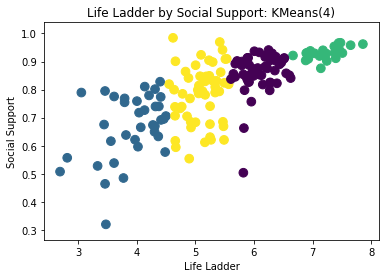

In [24]:
# Plot the clustered results
plt.scatter(socialsupport.Life_Ladder, socialsupport.Social_support, s=75, c=socialsupport.predicted_cluster)
plt.title('Life Ladder by Social Support: KMeans(4)')
plt.xlabel('Life Ladder')
plt.ylabel('Social Support');

In [25]:
# KMeans using GINI Index
kmeans.fit(GINI)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [26]:
# Predict the clusters
predicted_clusters_GINI = kmeans.predict(GINI)
predicted_clusters_GINI

array([2, 2, 0, 1, 2, 3, 3, 2, 0, 2, 3, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 2,
       3, 0, 0, 1, 2, 1, 0, 2, 0, 3, 2, 1, 3, 3, 0, 2, 1, 0, 1, 1, 0, 3,
       3, 2, 2, 2, 3, 2, 2, 1, 2, 0, 1, 1, 3, 0, 2, 0, 0, 3, 3, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 0, 0, 1, 3, 2, 0, 0, 2, 0, 3, 0, 1, 1,
       1, 2, 1, 2, 2, 0, 2, 2, 3, 1, 2, 2, 3, 2, 1, 1, 1, 1, 1, 2, 0, 2,
       0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 3, 3, 0, 1, 0, 1, 0, 2, 2, 0, 2, 3,
       3, 1, 1, 2, 2, 0, 0, 0], dtype=int32)

In [27]:
# Add predicted cluster to dataframe
GINI['predicted_cluster'] = predicted_clusters_GINI

In [28]:
GINI.head()

,Life_Ladder,GINI_avg_2000-2016,predicted_cluster
1,5.004403,0.303250,2
2,5.043086,0.276000,2
3,3.794838,0.473500,0
4,5.792797,0.460938,1
5,5.062449,0.319250,2


In [29]:
GINI = GINI.rename(columns={"GINI_avg_2000-2016": "GINI_avg"})

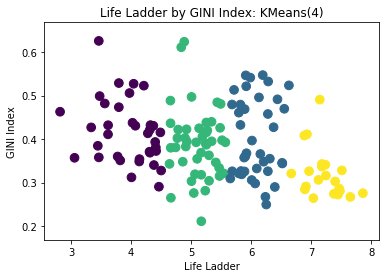

In [30]:
# Plot the clustered results
plt.scatter(GINI.Life_Ladder, GINI.GINI_avg, s=75, c=GINI.predicted_cluster)
plt.title('Life Ladder by GINI Index: KMeans(4)')
plt.xlabel('Life Ladder')
plt.ylabel('GINI Index');

In [31]:
# Require 3 rather than 4 Clusters using Life Expectancy
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

In [32]:
# Fit the model (minimize the variance within each of three groups):
kmeans.fit(lifeexpectancy)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
# Sorted into the clusters
predicted_clusters_LE = kmeans.predict(lifeexpectancy)
predicted_clusters_LE

array([2, 1, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1,
       1, 2, 0, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2,
       0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 2, 2,
       0, 2, 0, 1, 2, 1, 0, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 2, 2], dtype=int32)

In [35]:
# Add prediction to dataframe 
lifeexpectancy['predicted_cluster'] = predicted_clusters_LE
lifeexpectancy.head()

,Life_Ladder,Life_expectancy,predicted_cluster
0,2.694303,52.599998,2
1,5.004403,68.699997,1
2,5.043086,65.900002,1
3,3.794838,54.599998,2
4,5.792797,68.800003,1


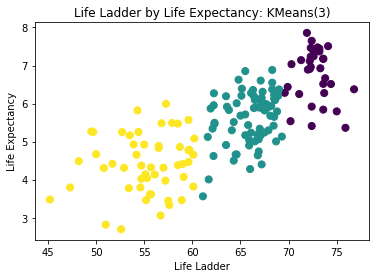

In [36]:
# Plot the clustered results
plt.scatter(lifeexpectancy.Life_expectancy, lifeexpectancy.Life_Ladder, s=50, c=lifeexpectancy.predicted_cluster)
plt.title('Life Ladder by Life Expectancy: KMeans(3)')
plt.xlabel('Life Ladder')
plt.ylabel('Life Expectancy');

### ANALYSIS:
#### The KMeans analysis shows there are various ways that our data can be clustered but there appears to be no obvious ways to cluster it or "natural groupings."

In [37]:
# preparing for other machine learning models by dropping missing data
happiness.dropna(inplace=True)
happiness.tail()

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg_2000-2016
159,Uruguay,6.371715,9.959661,0.917316,69.000000,0.876211,-0.108451,0.682916,0.876920,0.274946,0.361706,0.427364
160,Uzbekistan,6.205460,8.773365,0.920821,65.099998,0.969898,0.311695,0.520360,0.825422,0.208660,0.969356,0.348000
161,Venezuela,5.005663,9.270281,0.886882,66.500000,0.610855,-0.176156,0.827560,0.759221,0.373658,0.260700,0.497167
164,Zambia,4.041488,8.223958,0.717720,55.299999,0.790626,0.036644,0.810731,0.702698,0.350963,0.606715,0.527400
165,Zimbabwe,3.616480,7.553395,0.775388,55.599998,0.762675,-0.038384,0.844209,0.710119,0.211726,0.550508,0.432000


In [38]:
happiness = happiness.rename(columns={"GINI_avg_2000-2016": "GINI_avg"})
happiness

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,0.303250
3,Angola,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,0.473500
4,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,0.460938
5,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,0.319250
6,Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,0.342750
7,Austria,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679,0.302692
8,Azerbaijan,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372,0.211000
10,Bangladesh,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693,0.327750
11,Belarus,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279,0.281294
12,Belgium,6.892172,10.672445,0.929816,72.000000,0.808387,-0.127278,0.630412,0.749563,0.250297,0.441945,0.284308


# CLASSIFICATION

￼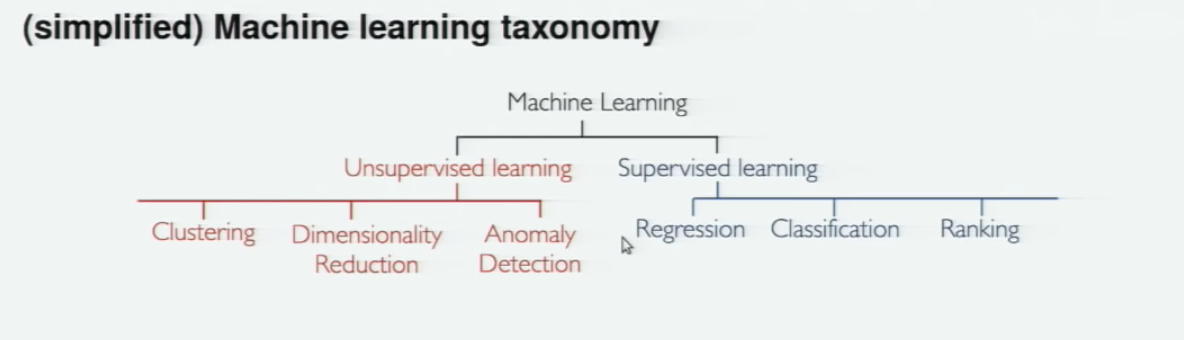

## CLUSTERING USING KMEANS:  Creating an Outcome Variable

In [39]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

In [40]:
# Cluster using GINI Coefficient and Life_Ladder: Two Clusters (mostly because there is no clear "groupings" in data)
kmeans = kmeans.fit(happiness[['Life_Ladder','GINI_avg']])
# Save the labels
happiness.loc[:,'label'] = kmeans.labels_
happiness.head()

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg,label
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,0.303250,0
3,Angola,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,0.473500,0
4,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,0.460938,1
5,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,0.319250,0
6,Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,0.342750,1


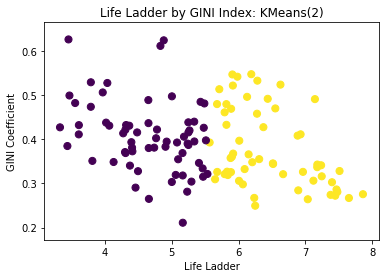

In [41]:
# Plot the clustered results
plt.scatter(happiness.Life_Ladder, happiness.GINI_avg, s=50, c=happiness.label)
plt.title('Life Ladder by GINI Index: KMeans(2)')
plt.xlabel('Life Ladder')
plt.ylabel('GINI Coefficient');

In [42]:
# Dispaly the two clusters (relatively unhappy vs. relatively happy)
happinessgroups = happiness.groupby(['label', 'Country']).sum()
happinessgroups

Life_Ladder  Log_GDP_pc  Social_support  \
label Country                                                             
0     Albania                      5.004403    9.412399        0.683592   
      Angola                       3.794838    8.741481        0.754615   
      Armenia                      5.062449    9.119424        0.814449   
      Azerbaijan                   5.167995    9.678014        0.781230   
      Bangladesh                   4.499217    8.220746        0.705556   
      Belarus                      5.233770    9.778739        0.904569   
      Bhutan                       5.082129    8.954588        0.847574   
      Botswana                     3.461366    9.680226        0.794936   
      Bulgaria                     5.098814    9.873219        0.923853   
      Burkina Faso                 4.927236    7.470520        0.664859   
      Cameroon                     5.250738    8.133471        0.676825   
      Central African Republic     3.475862    6.494117        0.319589   
      Chad                         4.486325    7.472575        0.577254   
      Comoros                      3.972820    7.260142        0.621303   
      Congo (Brazzaville)          5.490214    8.473279        0.620623   
      Congo (Kinshasa)             4.311033    6.694727        0.669688   
      Croatia                      5.536271   10.065751        0.909807   
      Djibouti                     4.369194    7.903007        0.632973   
      Dominican Republic           5.433216    9.626998        0.861986   
      Ethiopia                     4.379262    7.524517        0.740155   
      Gabon                        4.783009    9.718316        0.784828   
      Georgia                      4.659097    9.229100        0.617219   
      Ghana                        5.481311    8.349397        0.669111   
      Greece                       5.409289   10.132058        0.793501   
      Guinea                       5.252227    7.633718        0.630433   
      Haiti                        3.614928    7.416092        0.537976   
      India                        3.818069    8.830280        0.638052   
      Indonesia                    5.340296    9.362827        0.809379   
      Iran                         4.278118    9.886065        0.673765   
      Iraq                         4.462399    9.659120        0.695109   
...                                     ...         ...             ...   
1     Jamaica                      5.889759    9.011105        0.913030   
      Japan                        5.793575   10.581618        0.886432   
      Kazakhstan                   6.007636   10.111166        0.936657   
      Latvia                       5.901154   10.184117        0.913276   
      Lithuania                    6.308879   10.339512        0.929350   
      Luxembourg                   7.242631   11.453928        0.902192   
      Mauritius                    5.881741    9.956448        0.908842   
      Mexico                       6.549579    9.769919        0.858069   
      Moldova                      5.682277    8.592377        0.892080   
      Montenegro                   5.650190    9.732955        0.855980   
      Netherlands                  7.463097   10.809204        0.939443   
      Nicaragua                    5.818953    8.614512        0.854277   
      Norway                       7.444262   11.085626        0.965962   
      Panama                       6.281434   10.049730        0.904390   
      Paraguay                     5.713295    9.085571        0.902043   
      Peru                         5.679661    9.434348        0.845301   
      Portugal                     5.919823   10.262012        0.887113   
      Romania                      6.150879   10.112093        0.817930   
      Slovakia                     6.235111   10.352236        0.922379   
      Slovenia                     6.249419   10.397203        0.940971   
      South Korea                  5.840231   10.511578  

In [43]:
# Sorting the two clusters by happiness
happinessgroups.sort_values(['label','Life_Ladder'],ascending=False)


Life_Ladder  Log_GDP_pc  Social_support  \
label Country                                                             
1     Finland                      7.858107   10.636060        0.962155   
      Denmark                      7.648786   10.755594        0.958219   
      Switzerland                  7.508587   10.975945        0.930291   
      Iceland                      7.476214   10.746841        0.966753   
      Netherlands                  7.463097   10.809204        0.939443   
      Norway                       7.444262   11.085626        0.965962   
      Austria                      7.396002   10.741893        0.911668   
      Sweden                       7.374792   10.766932        0.930680   
      Luxembourg                   7.242631   11.453928        0.902192   
      United Kingdom               7.233445   10.596948        0.928484   
      Australia                    7.176993   10.721021        0.940137   
      Canada                       7.175497   10.701248        0.922719   
      Costa Rica                   7.141075    9.669426        0.875872   
      Germany                      7.118364   10.730945        0.919763   
      Czech Republic               7.034165   10.419474        0.929164   
      Ireland                      6.962336   11.163328        0.937862   
      Israel                       6.927179   10.424574        0.909595   
      Belgium                      6.892172   10.672445        0.929816   
      United States                6.882685   10.922465        0.903856   
      France                       6.665904   10.573352        0.921463   
      Guatemala                    6.626592    8.923429        0.841107   
      Mexico                       6.549579    9.769919        0.858069   
      Italy                        6.516527   10.480516        0.912656   
      Spain                        6.513371   10.465594        0.910315   
      Chile                        6.436221   10.065920        0.890085   
      Uruguay                      6.371715    9.959661        0.917316   
      Lithuania                    6.308879   10.339512        0.929350   
      Panama                       6.281434   10.049730        0.904390   
      El Salvador                  6.276246    8.911959        0.823999   
      Slovenia                     6.249419   10.397203        0.940971   
...                                     ...         ...             ...   
0     Kenya                        4.655703    8.032678        0.706720   
      Mozambique                   4.653714    7.039378        0.738480   
      Bangladesh                   4.499217    8.220746        0.705556   
      Chad                         4.486325    7.472575        0.577254   
      Iraq                         4.462399    9.659120        0.695109   
      Mali                         4.415730    7.627428        0.691859   
      Myanmar                      4.410633    8.685232        0.773826   
      Sri Lanka                    4.400223    9.400388        0.828065   
      Ethiopia                     4.379262    7.524517        0.740155   
      Djibouti                     4.369194    7.903007        0.632973   
      Uganda                       4.321715    7.458709        0.739841   
      Mauritania                   4.313615    8.196549        0.801596   
      Congo (Kinshasa)             4.311033    6.694727        0.669688   
      Sierra Leone                 4.305683    7.266166        0.649638   
      Iran                         4.278118    9.886065        0.673765   
      Liberia                      4.134853    6.630170        0.726750   
      Madagascar                   4.070587    7.279895        0.665513   
      Zambia                       4.041488    8.223958        0.717720   
      Togo                         4.022895    7.287405        0.596354   
      Comoros                      3.972820    7.260142        0.621303   
      India                        3.818069    8.830280  

### ANALYSIS:
#### We ended up using the KMeans Clustering algorithm to create two groups (relatively happy vs relatively unhappy countries).  These groups will be used in our other machine learning models as our categorical outcome variable for classification purposes.

## NEURAL NETWORK

In [44]:
# Creating DF for the NN
happiness2 = happiness.copy()
happiness2

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg,label
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,0.303250,0
3,Angola,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,0.473500,0
4,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,0.460938,1
5,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,0.319250,0
6,Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,0.342750,1
7,Austria,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679,0.302692,1
8,Azerbaijan,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372,0.211000,0
10,Bangladesh,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693,0.327750,0
11,Belarus,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279,0.281294,0
12,Belgium,6.892172,10.672445,0.929816,72.000000,0.808387,-0.127278,0.630412,0.749563,0.250297,0.441945,0.284308,1


In [45]:
# Dropping columns:  Life Ladder and GINI because they were used in creating the outcome variable ("label") and Country because it is string.
happiness2.drop(['Life_Ladder', 'GINI_avg', 'Country'], axis=1, inplace=True)
happiness2.head()

,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,label
1,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,0
3,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,0
4,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,1
5,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,0
6,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,1


In [46]:
# Assign X (data) and y (target)
X = happiness2.drop("label", axis=1)
y = happiness2["label"]
print(X.shape, y.shape) 

(123, 9) (123,)


In [47]:
# Splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [48]:
# Scaling date using MinMax procedure
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Import dependencies
from keras.models import Sequential
from keras.layers import Dense
import tensorflow
tensorflow.keras.__version__

Using TensorFlow backend.


'2.1.2-tf'

In [50]:
# Label-encode dataset
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [52]:
from keras.utils import to_categorical

In [53]:
# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)


In [54]:
# Create model and add two layers with 27 nodes each
model = Sequential()
model.add(Dense(units=27, activation='relu', input_dim=9))
model.add(Dense(units=27, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [55]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 27)                270       
_________________________________________________________________
dense_2 (Dense)              (None, 27)                756       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 56        
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________


In [57]:
# Model fit using training set
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
 - 0s - loss: 0.7405 - acc: 0.5000
Epoch 2/60
 - 0s - loss: 0.7152 - acc: 0.4783
Epoch 3/60
 - 0s - loss: 0.6941 - acc: 0.5543
Epoch 4/60
 - 0s - loss: 0.6744 - acc: 0.6304
Epoch 5/60
 - 0s - loss: 0.6591 - acc: 0.6957
Epoch 6/60
 - 0s - loss: 0.6462 - acc: 0.7065
Epoch 7/60
 - 0s - loss: 0.6319 - acc: 0.7500
Epoch 8/60
 - 0s - loss: 0.6190 - acc: 0.7609
Epoch 9/60
 - 0s - loss: 0.6059 - acc: 0.7717
Epoch 10/60
 - 0s - loss: 0.5929 - acc: 0.7935
Epoch 11/60
 - 0s - loss: 0.5801 - acc: 0.8043
Epoch 12/60
 - 0s - loss: 0.5684 - acc: 0.8152
Epoch 13/60
 - 0s - loss: 0.5552 - acc: 0.8152
Epoch 14/60
 - 0s - loss: 0.5425 - acc: 0.8370
Epoch 15/60
 - 0s - loss: 0.5308 - acc: 0.8370
Epoch 16/60
 - 0s - loss: 0.5181 - acc: 0.8370
Epoch 17/60
 - 0s - loss: 0.5066 - acc: 0.8370
Epoch 18/60
 - 0s - loss: 0.4943 - acc: 0.8370
Epoch 19/60
 - 0s - loss: 0.4841 - acc: 0.8370
Epoch 20/60
 - 0s - loss: 0.4721 - acc: 0.8478
Epoch 21/60
 - 0s - loss: 0.4622 - acc: 0.8370
Epoch 22/60
 - 0s - lo

In [58]:
# Testing the model 
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.34384143352508545, Accuracy: 0.8064516186714172


In [59]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [60]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: [1 0 0 0 0]
Actual Labels: [1, 1, 0, 0, 0]


### ANALYSIS:
#### Neural Network Model was fit and tested by splitting the data, scaling and encoding them. We used a two hidden layer model with 27 nodes each which fit the data with an accuracy of over .90.  We tested the model with the testing set and obtained an accuracy of about .84 with loss of .37.

## LOGISTIC REGRESSION

In [61]:
# Import dependencies for logistic model from Sci-Kit Learn
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Logistic regression model
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
# Fitting the model
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8695652173913043
Testing Data Score: 0.8387096774193549


### ANALYSIS:

#### The Logistic Regression model gave us similar results. The NN model was a bit more accurate with the training data but both resulted in about .84 accuracy with the testing data. To put this into words, both models were able to predict where the country belonged in our two happiness groups about 84 percent of the time using a fitted model on new data.

## SUPPORT VECTOR CLASSIFICATION

In [65]:
# Import dependencies from SK Learn for SVC Model
from sklearn.svm import SVC

In [66]:
# Create the SVC Model
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [67]:
# Model accuracy on training and testing datasets
print(f"Training Data Score: {svclassifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svclassifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8913043478260869
Testing Data Score: 0.8387096774193549


In [68]:
# Fine Tuning the Hyper Parameters
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.001, .01, 0.05]}
grid = GridSearchCV(svclassifier, param_grid, verbose=3)
grid

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [69]:
grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.001 ................................................
[CV] .................. C=1, gamma=0.001, score=0.71875, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.9333333333333333, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....... C=1, gamma=0.001, score=0.9333333333333333, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ................... C=1, gamma=0.01, score=0.71875, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9333333333333333, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........ C=1, gamma=0.01, score=0.9333333333333333, total=   0.0s
[CV] C=1, gamma=0.05 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.001, 0.01, 0.05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [70]:
print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_}")

Best Parameters: {'C': 1, 'gamma': 0.001}
Best Score: 0.8586956521739131


### ANALYSIS:
#### The SVC Model classified the training data with an accuracy of about .89 and predicted the outcome group of the countries with about .84 accuracy.  After fine tuning the hyperparameters of C and gamma we find that if we set our C = 1 and our gamma to .001 we can increase the accuracy of prediction by about 2 percent to .86.

## K NEAREST NEIGHBORS

In [71]:
from sklearn.neighbors import KNeighborsClassifier

k: 1, Train/Test Score: 1.000/0.710
k: 3, Train/Test Score: 0.902/0.839
k: 5, Train/Test Score: 0.848/0.806
k: 7, Train/Test Score: 0.870/0.806
k: 9, Train/Test Score: 0.848/0.806
k: 11, Train/Test Score: 0.880/0.774
k: 13, Train/Test Score: 0.880/0.871
k: 15, Train/Test Score: 0.870/0.871
k: 17, Train/Test Score: 0.859/0.871
k: 19, Train/Test Score: 0.859/0.903


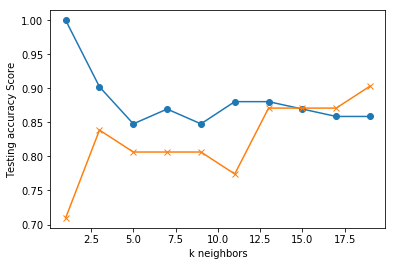

In [72]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [75]:
# Note that k = 19 provides the best accuracy where the classifier starts to stablize, even k = 3 does a reasonable job.
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=19 Test Acc: 0.903


In [76]:
# Using just 3 neighbors to classify does a reasonable job as well.
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
print('k=3 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=3 Test Acc: 0.839


### ANALYSIS:

The KNN model was perhaps one of our more successful models in terms of predicting the target.  The analysis demonstrates that K of 19 provides the most powerful predictive accuracy of .90 although with just 3 neighbors, the model does a fairly good job with an accuracy score of .83.

## RANDOM FOREST

In [148]:
# Import borreal dependencies
from sklearn import tree
import pandas as pd
import os

In [149]:
# Initial decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7096774193548387

In [150]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test) 

0.7419354838709677

In [151]:
feature_names = happiness2.columns

In [153]:
# Which features are most important to the RF classification
sorted(zip(rf.feature_importances_, feature_names), reverse=True) 

[(0.3114644543140648, 'Life_expectancy'),
 (0.18090556914815895, 'Social_support'),
 (0.16287783871110048, 'Log_GDP_pc'),
 (0.10431422759054149, 'Freedom_life_choices'),
 (0.07226120504331451, 'Positive_affect'),
 (0.06237822743266198, 'Negative_affect'),
 (0.041226091049881744, 'Confidence_government'),
 (0.03856921353378866, 'Perceptions_corruption'),
 (0.026003173176487225, 'Generosity')]

### ANALYSIS:
#### The random forest algorithm outperformed the more basic decision tree approach (.81 to .84).  The RF analysis identified which features were most important in achieving said accuracy:  Social support and life expectancy top the list.  Freedom to make life choices, positive affect on prior day, confidence level in government, perception of corruption in government, negative affect on the prior day, and generosity seemed to be relatively unimportant in being able to predict happiness group.

## LINEAR REGRESSION

In [177]:
#Import dependencies
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [178]:
#Original dataframe
happiness

,Country,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Positive_affect,Negative_affect,Confidence_government,GINI_avg,label
1,Albania,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.713300,0.318997,0.435338,0.303250,1
3,Angola,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.578517,0.367864,0.572346,0.473500,1
4,Argentina,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.820310,0.320502,0.261352,0.460938,0
5,Armenia,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.581488,0.454840,0.670828,0.319250,1
6,Australia,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.759019,0.187456,0.468837,0.342750,0
7,Austria,7.396002,10.741893,0.911668,73.000000,0.904112,0.051552,0.523061,0.752350,0.226059,0.488679,0.302692,0
8,Azerbaijan,5.167995,9.678014,0.781230,65.500000,0.772449,-0.251795,0.561206,0.592575,0.191392,0.834372,0.211000,1
10,Bangladesh,4.499217,8.220746,0.705556,64.300003,0.901471,-0.038008,0.701421,0.541345,0.361238,0.831693,0.327750,1
11,Belarus,5.233770,9.778739,0.904569,66.099998,0.643602,-0.181865,0.718455,0.450333,0.235729,0.421279,0.281294,1
12,Belgium,6.892172,10.672445,0.929816,72.000000,0.808387,-0.127278,0.630412,0.749563,0.250297,0.441945,0.284308,0


In [184]:
# Making a copy for the regression
regress = happiness.copy()

In [185]:
# Dropping columns not needed for model
regress.drop(['label', 'Country', 'Positive_affect'], axis=1, inplace=True)
regress.head()

,Life_Ladder,Log_GDP_pc,Social_support,Life_expectancy,Freedom_life_choices,Generosity,Perceptions_corruption,Negative_affect,Confidence_government,GINI_avg
1,5.004403,9.412399,0.683592,68.699997,0.824212,0.005385,0.899129,0.318997,0.435338,0.303250
3,3.794838,8.741481,0.754615,54.599998,0.374542,-0.157062,0.834076,0.367864,0.572346,0.473500
4,5.792797,9.809972,0.899912,68.800003,0.845895,-0.206937,0.855255,0.320502,0.261352,0.460938
5,5.062449,9.119424,0.814449,66.900002,0.807644,-0.149109,0.676826,0.454840,0.670828,0.319250
6,7.176993,10.721021,0.940137,73.599998,0.916028,0.137795,0.404647,0.187456,0.468837,0.342750


In [199]:
# Assign X (data) and y (target):  Here we make Life Ladder the target since it is ordinal.
X = regress.drop("Life_Ladder", axis=1)
y = regress["Life_Ladder"]
print(X.shape, y.shape) 

(123, 9) (123,)


In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [201]:
# Scaling date using Standard procedure
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)


X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [202]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

In [203]:
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.791767057542333
Testing Score: 0.6071427179954342


In [204]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.405156881999141, R2: 0.6071427179954342


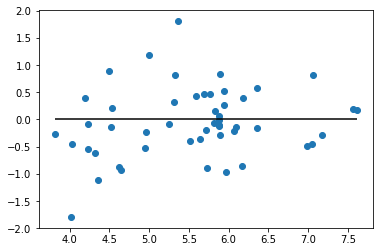

In [205]:
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

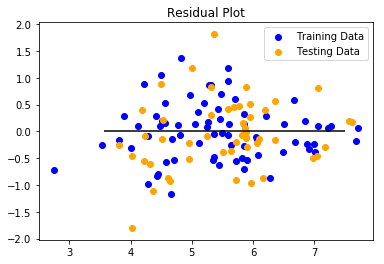

In [206]:
# Residual Scatter Plot
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

### ANALYSIS:
#### Regression ML model resulted in an accuracy score of .79 in the training set and .61 in the testing set.  This is considerably lower than the accuracy of the classification models above which makes sense given more variance in the target (ordinal measure compared to dichotomous).

## Standard OLS MODEL (Not ML)

In [207]:
X_constant = sm.add_constant(X)

In [208]:
model = sm.OLS(y, X_constant)
lin_reg = model.fit()

In [209]:
lin_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Life_Ladder   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     36.50
Date:                Mon, 05 Aug 2019   Prob (F-statistic):           1.77e-29
Time:                        18:38:58   Log-Likelihood:                -101.74
No. Observations:                 123   AIC:                             223.5
Df Residuals:                     113   BIC:                             251.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.3692      1.147     -0.322      0.748      -2.642       1.903
Log_GDP_pc                 0.3135      0.098      3.211      0.002       0.120       0.507
Social_support             1.9910      0.862      2.309      0.023       0.283       3.699
Life_expectancy            0.0149      0.016      0.905      0.367      -0.018       0.048
Freedom_life_choices       2.6025      0.620      4.199      0.000       1.374       3.831
Generosity                 0.5819      0.396      1.469      0.145      -0.203       1.367
Perceptions_corruption    -1.2741      0.390     -3.263      0.001      -2.048      -0.500
Negative_affect            1.0551      0.765      1.379      0.171      -0.461       2.571
Confidence_government     -1.2093      0.386     -3.135      0.002      -1.973      -0.445
GINI_avg                  -0.8931      0.722     -1.237      0.219      -2.324       0.538
==============================================================================
Omnibus:                        2.657   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.254
Skew:                          -0.177   Prob(JB):                        0.324
Kurtosis:                       3.561   Cond. No.                     1.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ANALYSIS:
#### The OLS model explained 74 percent of the variance in the outcome measure of happiness (i.e., Life Ladder).  The model was significant.  Durbin-Watson test showed possibility of moderate autocorrelation of the predictor variables.  There may be some model specification issues as a result. The model estimates:
- a 1 unit increase in GDP per capita results in a .31 increase in Life Ladder scale (all else held constant).
- having social support (someone who could be called upon when in trouble) is associated with an approximate 2 unit increase in happiness.
- Life expectancy has no statistically or otherwise significant relationship with happiness (all else held constant).
- Having a sense of freedom to make ones own life choices is associated with a 2.6 point increase in happiness compared with those who do not enjoy such freedom all else constant.
- Generosity (i.e., donating money to charity) has no statistically significant relationship to happiness.
- Perception of there being government and business corruption is associated with statistically significant lower happiness by 1.2 points, holding all else constant.
- Negative affect the day previous to taking the survey was not statistically significant.
- Counterintuitively, confidence in government was negatively associated with happiness (perhaps due to multicollinearity/autocorrelation or model specification problems).
- Inequality (as measured by GINI Index) was not statistically signficantly related to happiness.  This may also be a modeling dilemma.